# PROBLEM STATEMENT

- In this project, a regression model is developed to predict the probability of being accepted for Graduate school.
- Data Source: https://www.kaggle.com/mohansacharya/graduate-admissions
- Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

- The dataset contains the following parameters: 
    - GRE Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# IMPORT DATASET

In [2]:
dataset = pd.read_csv('dataset/Admission.csv')

In [3]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
dataset.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [6]:
dataset.tail(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
390,391,314,102,2,2.0,2.5,8.24,0,0.64
391,392,318,106,3,2.0,3.0,8.65,0,0.71
392,393,326,112,4,4.0,3.5,9.12,1,0.84
393,394,317,104,2,3.0,3.0,8.76,0,0.77
394,395,329,111,4,4.5,4.0,9.23,1,0.89
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


# VISUALIZE DATASET

In [7]:
dataset = dataset.drop(['Serial No.'], axis = 1)

dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


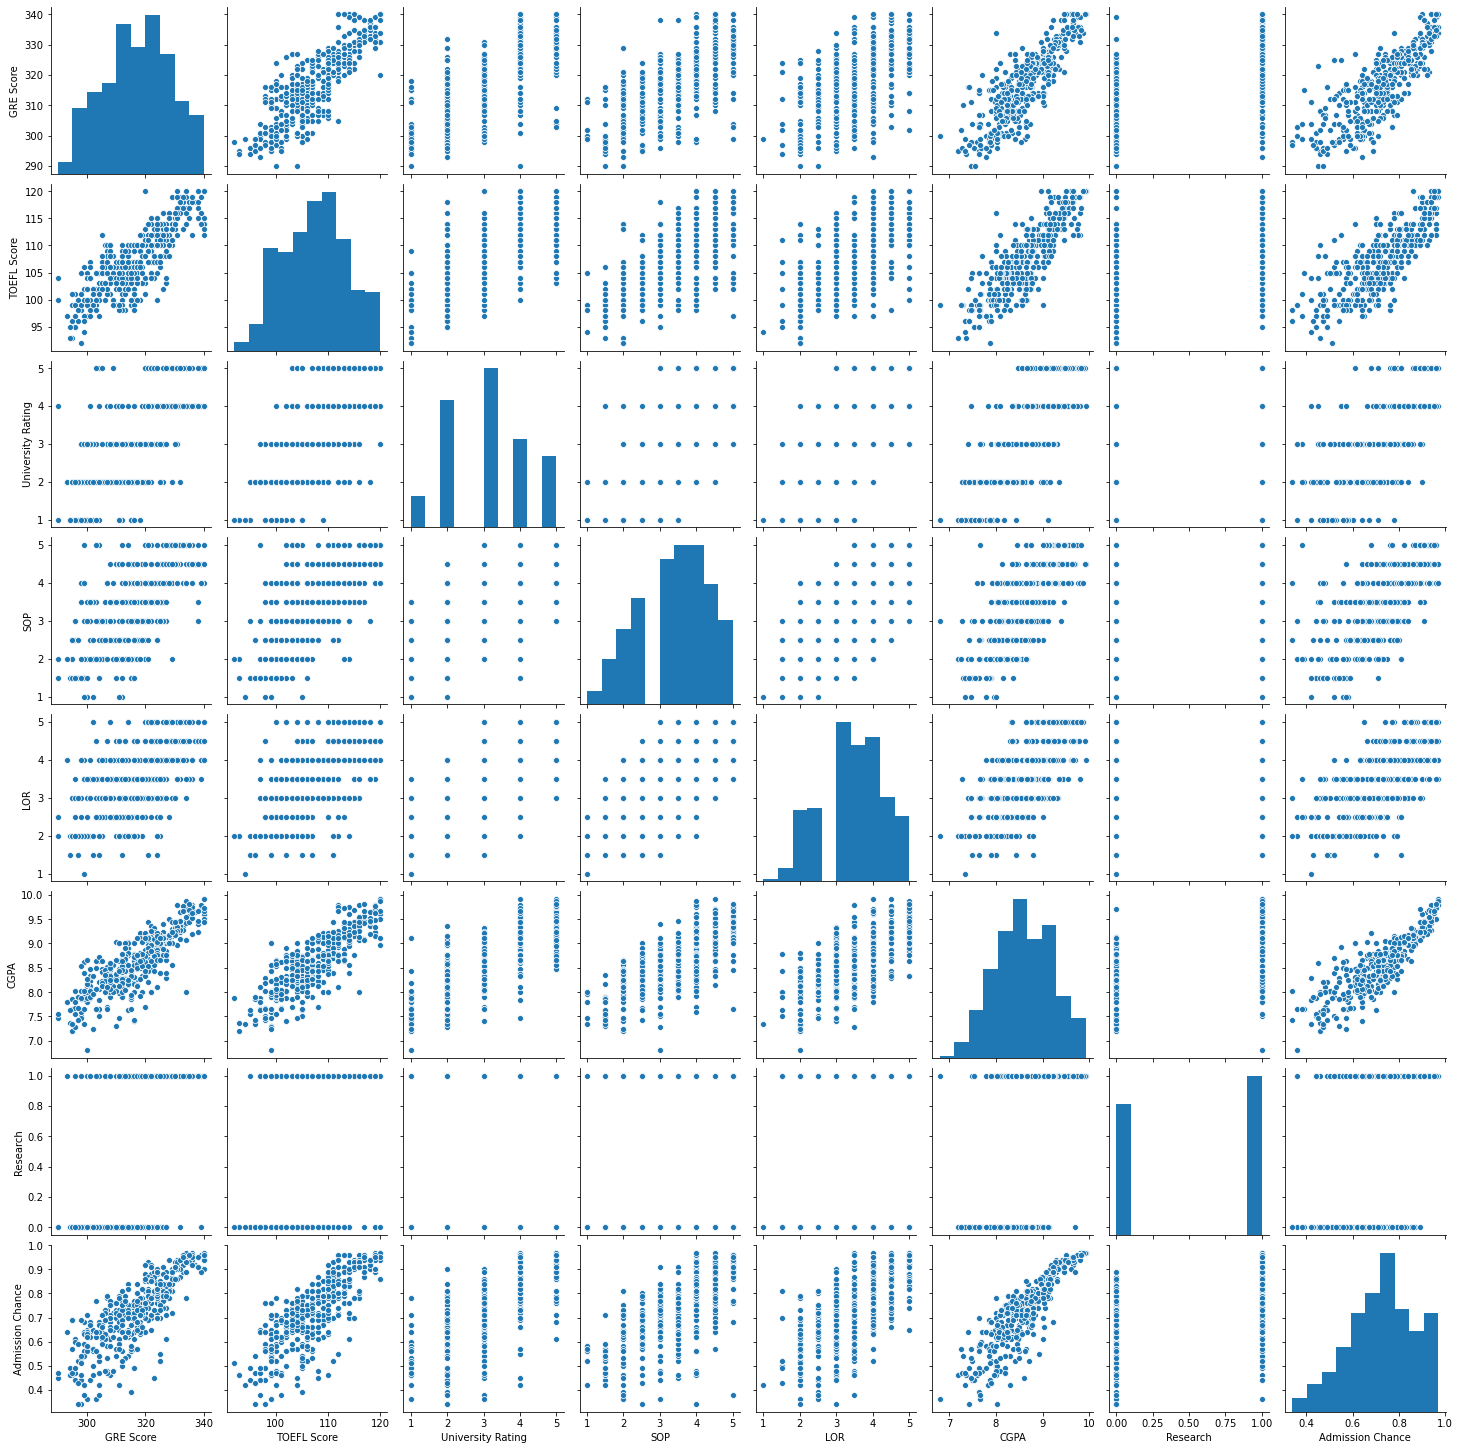

In [8]:
sns.pairplot(dataset)

In [9]:
column_headers = dataset.columns.values

print(column_headers)

['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research' 'Admission Chance']


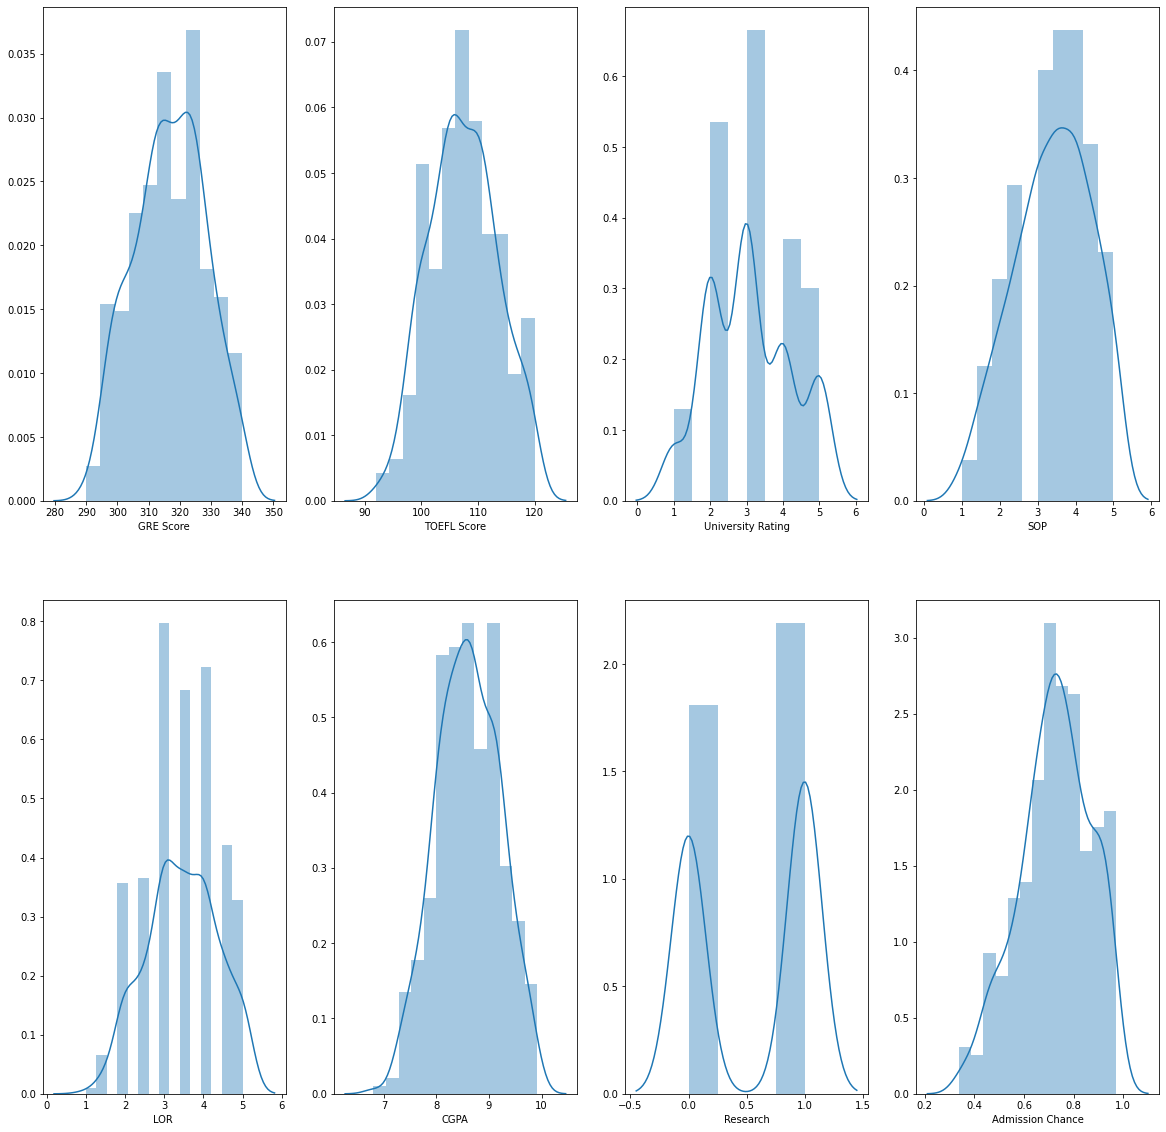

In [10]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(2, 4, i)
    sns.distplot(dataset[column_header])
    i += 1

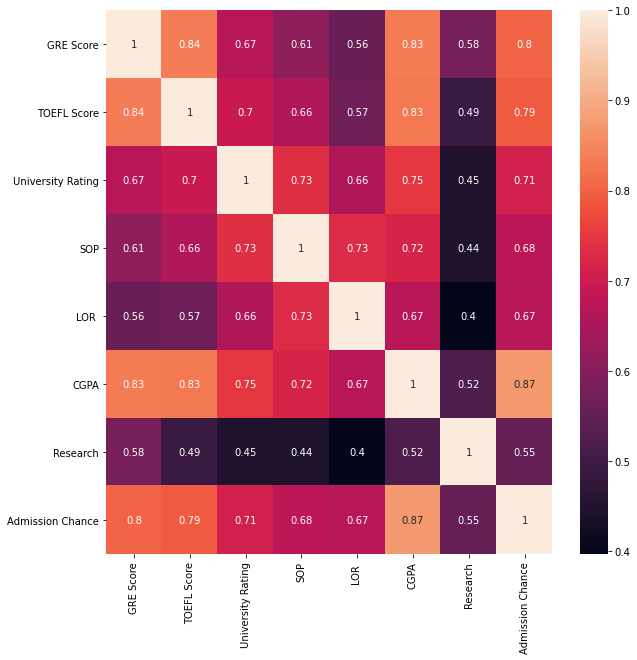

In [11]:
plt.figure(figsize = (10, 10))
sns.heatmap(dataset.corr(), annot = True)

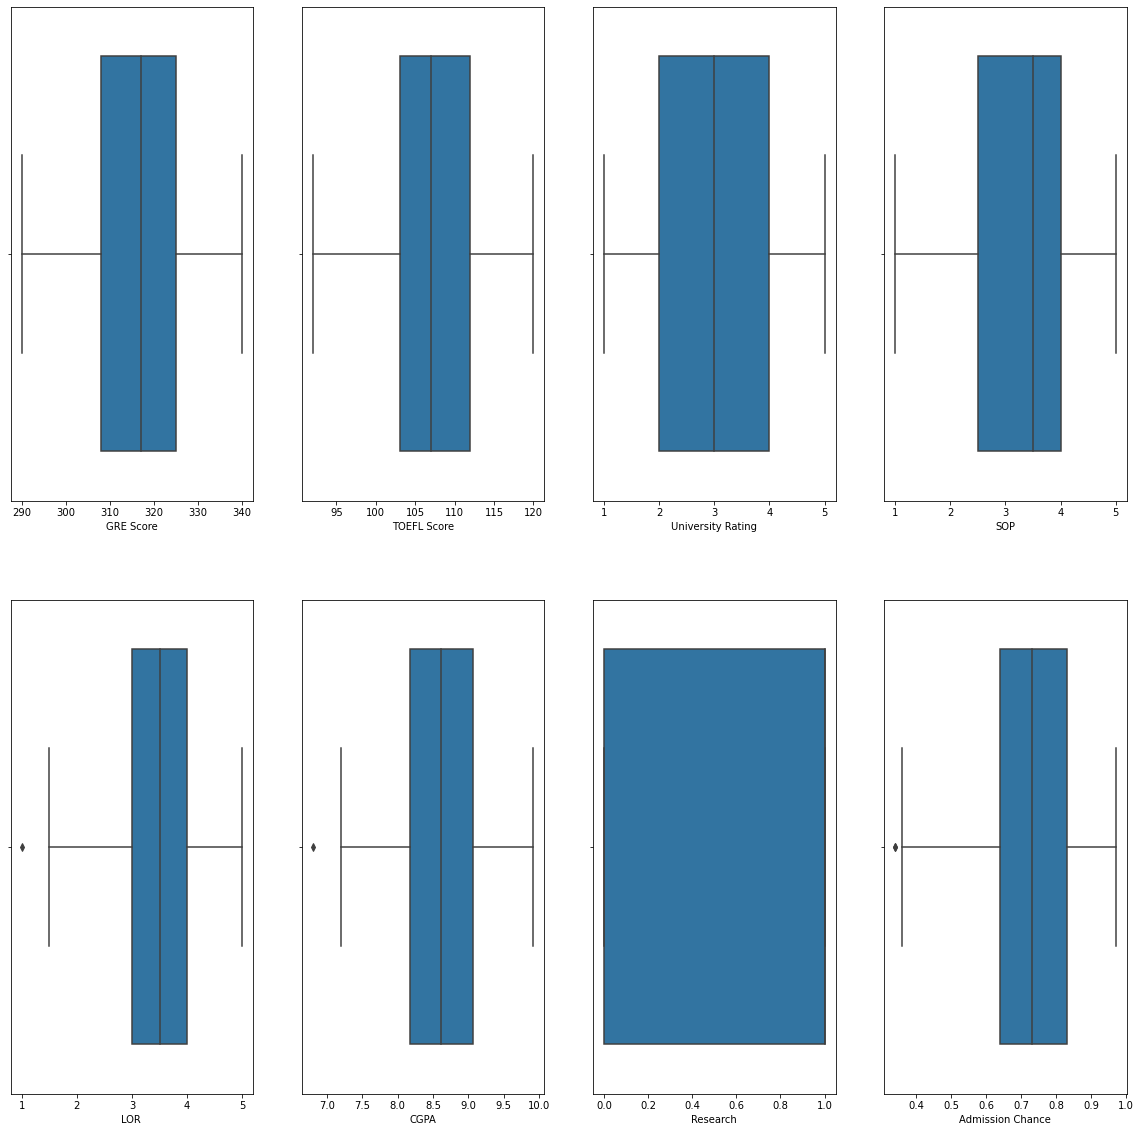

In [12]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(2, 4, i)
    sns.boxplot(dataset[column_header])
    i += 1

# CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [13]:
X = dataset.drop(['Admission Chance'], axis = 1)
y = dataset['Admission Chance']

print(X)
print(y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(280, 7) (280,)
(120, 7) (120,)


# TRAINING THE MODEL

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
print('Linear model coeff (m)', regressor.coef_)
print('Linear model coeff (b)', regressor.intercept_)

Linear model coeff (m) [ 0.00227485  0.00231624  0.00279836 -0.00243348  0.01972628  0.12168723
  0.02179253]
Linear model coeff (b) -1.370773744578371


# EVALUATING THE MODEL 

In [19]:
y_pred = regressor.predict(X_test)

print(y_pred)

[0.96242179 0.65973912 0.72975051 0.7789061  0.81563715 0.62005826
 0.69971216 0.54386287 0.50172598 0.94077841 0.60286994 0.50255165
 0.84940071 0.88874689 0.87709049 0.80100382 0.63048713 0.83209538
 0.74212751 0.7297294  0.68241685 0.58128034 0.62624727 0.66541201
 0.82004712 0.79162803 0.6761369  0.57943759 0.69812062 0.73777302
 0.56538292 0.49968637 0.62453253 0.85877264 0.8311256  0.77820792
 0.55994128 0.94717803 0.95310443 0.9335223  0.60549401 0.85286339
 0.64815907 0.75446915 0.84360511 0.64432694 0.88893502 0.61949898
 0.64163111 0.81024586 0.61048451 0.92008998 0.7756982  0.55786541
 0.96486858 0.60459334 0.64261427 0.66952031 0.72374873 0.82762904
 0.6552135  0.73610108 0.80567781 0.64108736 0.68392932 0.87854651
 0.71972214 0.70134743 0.9324176  0.78477182 0.96909239 0.53893109
 0.92975404 0.60128936 0.65070205 0.77947312 0.86686404 0.9887002
 0.91455843 0.51650361 0.85886657 0.82638869 0.82551385 0.42924799
 0.56631179 0.88226424 0.71851062 0.6399996  0.62777844 0.63189

Text(0.5, 0, 'True Values')

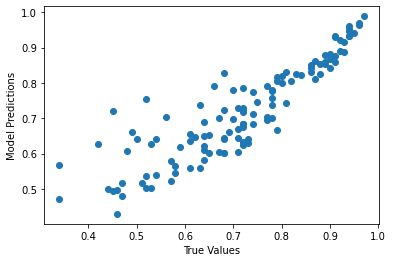

In [20]:
plt.scatter(y_test, y_pred)
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [21]:
k = X_test.shape[1]
n = len(X_test)

print('k =', k, '\nn =', n)

k = 7 
n = 120


In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [23]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_pred)/y_test ) )*100

print('RMSE =', RMSE)
print('MSE =', MSE)
print('MAE =', MAE)
print('R2 =', r2)
print('adj_r2 =', adj_r2)
print('Mean Absolute Percentage Error =', MAPE, '%')

RMSE = 0.07
MSE = 0.004952366752695939
MAE = 0.0489541387540938
R2 = 0.7880975294649062
adj_r2 = 0.7748536250564628
Mean Absolute Percentage Error = 8.226590077452903 %


20% Testing data, 80% Training data
- RMSE = 0.063
- MSE = 0.00391232272894179
- MAE = 0.04772503036616727
- R2 = 0.780405326067898
- adj_r2 = 0.7590558438800548
- Mean Absolute Percentage Error = 7.8099135952908645 %

# RETRAIN AND VISUALIZE THE RESULTS

In [24]:
X = dataset[['GRE Score', 'TOEFL Score']]
y = dataset['Admission Chance']

print(X)
print(y)

     GRE Score  TOEFL Score
0          337          118
1          324          107
2          316          104
3          322          110
4          314          103
..         ...          ...
395        324          110
396        325          107
397        330          116
398        312          103
399        333          117

[400 rows x 2 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Admission Chance, Length: 400, dtype: float64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(320, 2) (320,)
(80, 2) (80,)


In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Linear model coeff (m)', regressor.coef_)
print('Linear model coeff (b)', regressor.intercept_)

Linear model coeff (m) [0.00587538 0.00911882]
Linear model coeff (b) -2.1166639450077778


In [27]:
y_pred = regressor.predict(X_test)

print(y_pred)

[0.53047652 0.91787981 0.82852609 0.71303888 0.88587094 0.71181592
 0.93085354 0.76328538 0.91585934 0.76328538 0.75294361 0.76328538
 0.77827958 0.74829118 0.55397806 0.62833758 0.72215769 0.60807948
 0.52196918 0.55783297 0.75679852 0.45874895 0.46462434 0.7124274
 0.64779817 0.68568243 0.61395486 0.87675212 0.70067663 0.80826798
 0.67129971 0.64333178 0.89174632 0.73390846 0.7424158  0.81151141
 0.69418977 0.64455474 0.77827958 0.77827958 0.90147661 0.67068823
 0.65569403 0.68507095 0.78941888 0.67778657 0.54871415 0.72154621
 0.79064183 0.82001875 0.67393166 0.682439   0.65306208 0.74565923
 0.77827958 0.76916077 0.6960242  0.6210532  0.6674448  0.65183912
 0.50373155 0.62754006 0.61334338 0.64272031 0.77564763 0.82589414
 0.7124274  0.79914917 0.58782137 0.61071143 0.72356669 0.80502455
 0.86175792 0.79003035 0.6524506  0.93936088 0.65893746 0.607468
 0.76854929 0.69418977]


Text(0.5, 0, 'True Values')

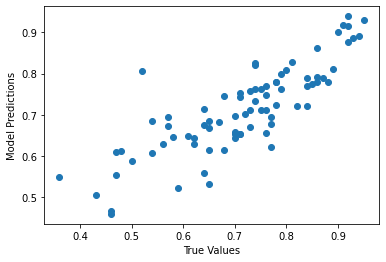

In [28]:
plt.scatter(y_test, y_pred)
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [29]:
k = X_test.shape[1]
n = len(X_test)

print('k =', k, '\nn =', n)

k = 2 
n = 80


In [30]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_pred)/y_test ) )*100

print('RMSE =', RMSE)
print('MSE =', MSE)
print('MAE =', MAE)
print('R2 =', r2)
print('adj_r2 =', adj_r2)
print('Mean Absolute Percentage Error =', MAPE, '%')

RMSE = 0.075
MSE = 0.0056188592418774785
MAE = 0.05724772657341968
R2 = 0.6922856489641723
adj_r2 = 0.6842930684177873
Mean Absolute Percentage Error = 9.003580260333546 %
